In [2]:
conda install numpy matplotlib tensorflow keras

Solving environment: done

## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - keras
    - matplotlib
    - numpy
    - tensorflow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    absl-py-0.7.1              |           py37_0         154 KB  conda-forge
    astor-0.7.1                |             py_0          22 KB  conda-forge
    binutils_impl_linux-64-2.31.1|       h6176602_1        16.5 MB  defaults
    binutils_linux-64-2.31.1   |       h6176602_3           9 KB  defaults
    c-ares-1.15.0              |    h14c3975_1001          98 KB  conda-forge
    cycler-0.10.0              |             py_1           8 KB  conda-forge
    dbus-1.13.6                |       he372182_0         602 KB  conda-forge
    expat-2.2.5                |    hf484d3e_1002         185 KB  conda-forge
    fontconfig-2.13.1          |    he4413a7_1000     

700 train samples
300 test samples
Train on 700 samples, validate on 300 samples
Epoch 1/100
700/700 [==============================] - 1s 825us/step - loss: -0.2086 - acc: 0.0000e+00 - val_loss: -0.0125 - val_acc: 0.0000e+00
Epoch 2/100
700/700 [==============================] - 0s 125us/step - loss: -0.5920 - acc: 0.0000e+00 - val_loss: -1.3742 - val_acc: 0.0000e+00
Epoch 3/100
700/700 [==============================] - 0s 152us/step - loss: -3.5527 - acc: 0.0243 - val_loss: -6.0384 - val_acc: 0.1333
Epoch 4/100
700/700 [==============================] - 0s 223us/step - loss: -6.5172 - acc: 0.2143 - val_loss: -7.1586 - val_acc: 0.2333
Epoch 5/100
700/700 [==============================] - 0s 145us/step - loss: -7.2926 - acc: 0.3057 - val_loss: -7.7087 - val_acc: 0.3167
Epoch 6/100
700/700 [==============================] - 0s 154us/step - loss: -7.8764 - acc: 0.3529 - val_loss: -8.3174 - val_acc: 0.3200
Epoch 7/100
700/700 [==============================] - 0s 153us/step - loss: -8.5

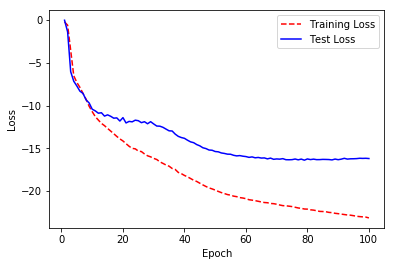

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

n1 = []
n2 = []
teacher = []
# entrada = np.arange(80)
entrada = []
binario = " "

Tensor_Suma_Entrada = np.ones((1000, 22))*(-1)
Tensor_Suma_Input = np.ones((700, 22))*(-1)
Tensor_Suma_Test = np.ones((300, 22))*(-1)

Tensor_Teacher_Entrada = np.ones((1000, 11))*(-1)
Tensor_Teacher_Input = np.ones((700, 11))*(-1)
Tensor_Teacher_Test = np.ones((300, 11))*(-1)


for i in range(1000):

    n1.append(random.randrange(1, 1000))
    x1 = n1[i]
    binario = bin(n1[i])[2:]
    n1[i] = str(binario)

    n2.append(random.randrange(1, 1000))
    x2 = n2[i]
    binario = bin(n2[i])[2:]
    n2[i] = str(binario)

    x3 = x1+x2
    teacher.append(x3)
    binario = bin(x1+x2)[2:]
    teacher[i] = str(binario)


for k in range(1000):
    if len(n1[k]) < 11:
        for j in range(11-len(n1[k])):
            n1[k] = "0"+n1[k]
    if len(n2[k]) < 11:
        for j in range(11-len(n2[k])):
            n2[k] = "0"+n2[k]
    if len(teacher[k]) < 11:
        for j in range(11-len(teacher[k])):
            teacher[k] = "0"+teacher[k]
    entrada.append(n1[k]+n2[k])


# Conversion de Datos de totales en 1 y -1

for p in range(1000):
    for q in range(22):
        if int(entrada[p][q]) == 1:
            Tensor_Suma_Entrada[p, q] = 1

for p in range(1000):
    for q in range(11):
        if int(teacher[p][q]) == 1:
            Tensor_Teacher_Entrada[p, q] = 1

# Armo el set de entrada

for p in range(0,699):
            Tensor_Suma_Input[p] [:]= Tensor_Suma_Entrada[p][:]
for p1 in range(700,1000):
            Tensor_Suma_Test[p1-700][:] = Tensor_Suma_Entrada[p1][:]
            
for p2 in range(0,699):
            Tensor_Teacher_Input[p2][:] = Tensor_Teacher_Entrada[p2][:]
for p3 in range(700,999): 
            Tensor_Teacher_Test[p3-700][:] = Tensor_Teacher_Entrada[p3][:]


batch_size = 30
epochs = 100

x_train = Tensor_Suma_Input
y_train = Tensor_Teacher_Input
x_test = Tensor_Suma_Test
y_test = Tensor_Teacher_Test

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation
from keras.optimizers import adam, sgd,RMSprop,adadelta

model = Sequential([
            Dense(88, kernel_initializer='uniform', input_dim=22),
            Activation('tanh'),
            Dense(88), Activation('sigmoid'),
            Dense(11), Activation('sigmoid')
        ])

model = Sequential([
            Dense(88, kernel_initializer='uniform', input_dim=22),
            Activation('tanh'),
            Dense(88), Activation('sigmoid'),
            Dense(11), Activation('sigmoid')
        ])

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop
              (lr=0.01, rho=0.9, epsilon=None, decay=0.0))


model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
#plt.plot(batch_size)
#plt.plot(epochs)
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();


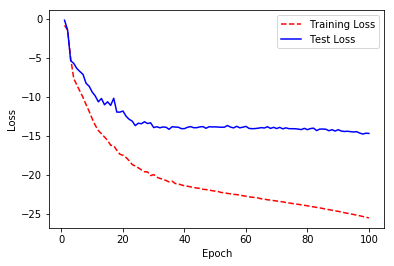

In [3]:
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
#plt.plot(batch_size)
#plt.plot(epochs)
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();
